# Task 1 

# TITANIC SURVIVAL PREDICTION:

In [74]:
import pandas as pd 
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt


reloading the Data

In [75]:
train_data=pd.read_csv('Titanic-Dataset.csv')

In [76]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Explore and clean the dataset

from here we see there is 687 missing value from 891 so we doesn't need this column cabin

In [77]:
train_data.drop('Cabin', axis=1, inplace=True)

In [78]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [79]:
total=train_data.shape[0]
survived_count = train_data[train_data['Survived'] == 1].shape[0]

non_survived_count = train_data[train_data['Survived'] == 0].shape[0]

In [80]:
print(f"{survived_count/total* 100} %")

38.38383838383838 %


# Dealing with Embarked and Pclass

In [81]:
train_data['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

we see that females survive by 80% and males by 20%

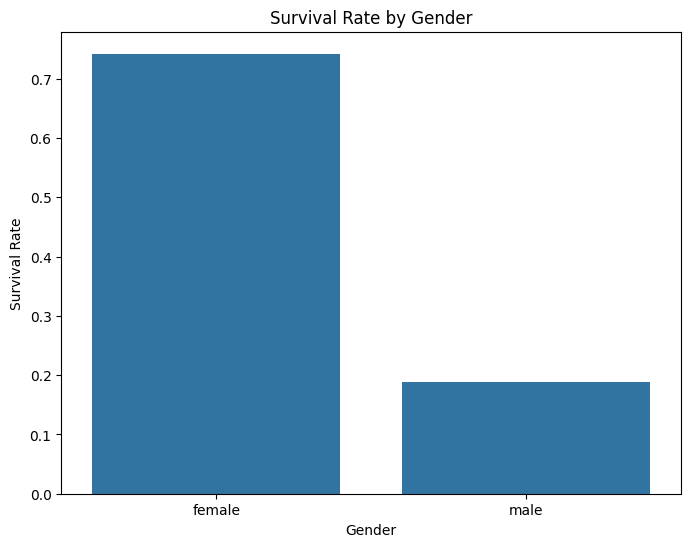

In [83]:

# Calculate survival rate by sex
survival_rate_by_sex = train_data.groupby('Sex')['Survived'].mean()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=survival_rate_by_sex.index, y=survival_rate_by_sex.values)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.xlabel('Gender')
plt.show()

In [84]:
# Step 1: Create an imputer instance with a strategy of 'mean' to replace missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Step 2: Fit the imputer to the 'Age' column and transform it
train_data['Age'] = imputer.fit_transform(train_data[['Age']])

# Now, the 'Age' column in 'train_data' has missing values filled with the mean age

In [85]:
train_data['Age'].isnull().sum()

0

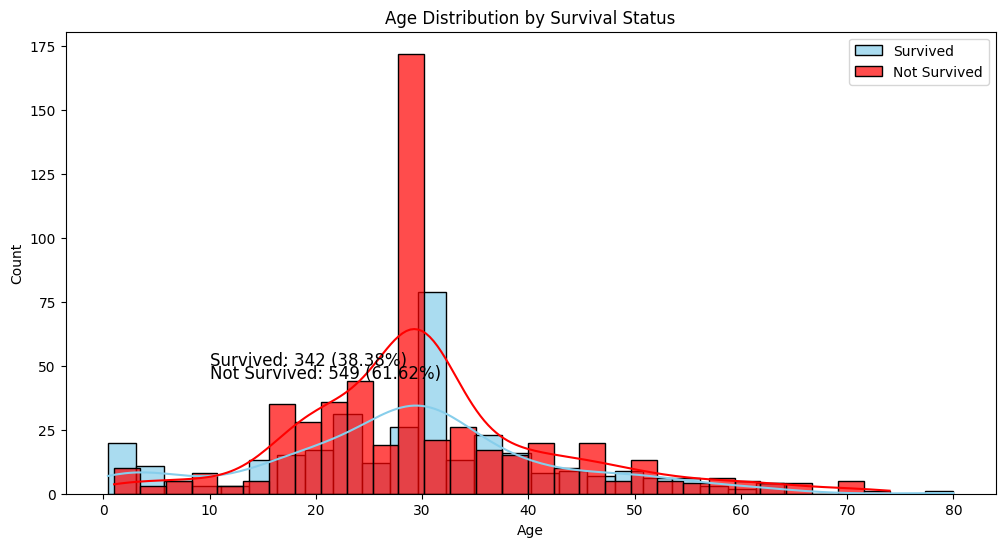

In [86]:

# Assuming 'train_data' is your DataFrame and it contains 'Age' and 'Survived' columns

# Separate ages by survival status
ages_survived = train_data[train_data['Survived'] == 1]['Age']
ages_not_survived = train_data[train_data['Survived'] == 0]['Age']

# Plot
plt.figure(figsize=(12, 6))
sns.histplot(ages_survived, color="skyblue", label="Survived", kde=True, bins=30, alpha=0.7)
sns.histplot(ages_not_survived, color="red", label="Not Survived", kde=True, bins=30, alpha=0.7)

# Add percentage text
total_survived = len(ages_survived)
total_not_survived = len(ages_not_survived)
plt.text(10, 50, f"Survived: {total_survived} ({total_survived / (total_survived + total_not_survived) * 100:.2f}%)", fontsize=12)
plt.text(10, 45, f"Not Survived: {total_not_survived} ({total_not_survived / (total_survived + total_not_survived) * 100:.2f}%)", fontsize=12)

plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()


we see that of unsurvived personnes start increase in second order polynomial untill the age of 30 where stop in max then he start decreasing after 30 but in expential order and the survived ones they start increase but in speed less then the unsurvived and decrease in the same way

In [87]:
# Define the transformation function
def transform_age_based_on_survival(age, survived):
    if age <= 30:
        return train_data['Age'].count() ** 2 if survived == 0 else age ** 1.5
    else:
        return np.exp(-age)

# Apply the function to create a new feature
train_data['index_Age'] = train_data.apply(lambda row: transform_age_based_on_survival(row['Age'], row['Survived']), axis=1)


In [88]:
# Assuming 'train_data' is your DataFrame

# Step 1: Create a mapping from 'Sex' to survival rates
gender_to_survival_rate = {'female': 0.8, 'male': 0.2}

# Step 2: Apply the mapping to create a new feature
train_data['Gender_Survival_index'] = train_data['Sex'].map(gender_to_survival_rate)

# Now 'train_data' has a new column 'Gender_Survival_Rate' with the survival rates based on gender

In [89]:
train_data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [90]:
train_data['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [91]:
# Calculate survived counts by embarkation point and passenger class
C_1 = train_data[(train_data['Survived'] == 1) & (train_data['Embarked'] == 'C') & (train_data['Pclass'] == 1)].shape[0]
C_2 = train_data[(train_data['Survived'] == 1) & (train_data['Embarked'] == 'C') & (train_data['Pclass'] == 2)].shape[0]
C_3 = train_data[(train_data['Survived'] == 1) & (train_data['Embarked'] == 'C') & (train_data['Pclass'] == 3)].shape[0]

S_1 = train_data[(train_data['Survived'] == 1) & (train_data['Embarked'] == 'S') & (train_data['Pclass'] == 1)].shape[0]
S_2 = train_data[(train_data['Survived'] == 1) & (train_data['Embarked'] == 'S') & (train_data['Pclass'] == 2)].shape[0]
S_3 = train_data[(train_data['Survived'] == 1) & (train_data['Embarked'] == 'S') & (train_data['Pclass'] == 3)].shape[0]

Q_1 = train_data[(train_data['Survived'] == 1) & (train_data['Embarked'] == 'Q') & (train_data['Pclass'] == 1)].shape[0]
Q_2 = train_data[(train_data['Survived'] == 1) & (train_data['Embarked'] == 'Q') & (train_data['Pclass'] == 2)].shape[0]
Q_3 = train_data[(train_data['Survived'] == 1) & (train_data['Embarked'] == 'Q') & (train_data['Pclass'] == 3)].shape[0]

# Calculate non-survived counts by embarkation point and passenger class
not_C_1 = train_data[(train_data['Survived'] == 0) & (train_data['Embarked'] == 'C') & (train_data['Pclass'] == 1)].shape[0]
not_C_2 = train_data[(train_data['Survived'] == 0) & (train_data['Embarked'] == 'C') & (train_data['Pclass'] == 2)].shape[0]
not_C_3 = train_data[(train_data['Survived'] == 0) & (train_data['Embarked'] == 'C') & (train_data['Pclass'] == 3)].shape[0]

not_S_1 = train_data[(train_data['Survived'] == 0) & (train_data['Embarked'] == 'S') & (train_data['Pclass'] == 1)].shape[0]
not_S_2 = train_data[(train_data['Survived'] == 0) & (train_data['Embarked'] == 'S') & (train_data['Pclass'] == 2)].shape[0]
not_S_3 = train_data[(train_data['Survived'] == 0) & (train_data['Embarked'] == 'S') & (train_data['Pclass'] == 3)].shape[0]

not_Q_1 = train_data[(train_data['Survived'] == 0) & (train_data['Embarked'] == 'Q') & (train_data['Pclass'] == 1)].shape[0]
not_Q_2 = train_data[(train_data['Survived'] == 0) & (train_data['Embarked'] == 'Q') & (train_data['Pclass'] == 2)].shape[0]
not_Q_3 = train_data[(train_data['Survived'] == 0) & (train_data['Embarked'] == 'Q') & (train_data['Pclass'] == 3)].shape[0]

In [92]:
print(f"Survived from Cherbourg (France):")
print(f"Class 1: {C_1} ({C_1 / survived_count * 100:.2f}%)")
print(f"Class 2: {C_2} ({C_2 / survived_count * 100:.2f}%)")
print(f"Class 3: {C_3} ({C_3 / survived_count * 100:.2f}%)")
print()

print(f"Survived from Southampton (United Kingdom):")
print(f"Class 1: {S_1} ({S_1 / survived_count * 100:.2f}%)")
print(f"Class 2: {S_2} ({S_2 / survived_count * 100:.2f}%)")
print(f"Class 3: {S_3} ({S_3 / survived_count * 100:.2f}%)")
print()

print(f"Survived from Queenstown (now known as Cobh, Ireland):")
print(f"Class 1: {Q_1} ({Q_1 / survived_count * 100:.2f}%)")
print(f"Class 2: {Q_2} ({Q_2 / survived_count * 100:.2f}%)")
print(f"Class 3: {Q_3} ({Q_3 / survived_count * 100:.2f}%)")
print()

print(f"Unsurvived from Cherbourg (France):")
print(f"Class 1: {not_C_1} ({not_C_1 / non_survived_count * 100:.2f}%)")
print(f"Class 2: {not_C_2} ({not_C_2 / non_survived_count * 100:.2f}%)")
print(f"Class 3: {not_C_3} ({not_C_3 / non_survived_count * 100:.2f}%)")
print()

print(f"Unsurvived from Southampton (United Kingdom):")
print(f"Class 1: {not_S_1} ({not_S_1 / non_survived_count * 100:.2f}%)")
print(f"Class 2: {not_S_2} ({not_S_2 / non_survived_count * 100:.2f}%)")
print(f"Class 3: {not_S_3} ({not_S_3 / non_survived_count * 100:.2f}%)")
print()

print(f"Unsurvived from Queenstown (now known as Cobh, Ireland):")
print(f"Class 1: {not_Q_1} ({not_Q_1 / non_survived_count * 100:.2f}%)")
print(f"Class 2: {not_Q_2} ({not_Q_2 / non_survived_count * 100:.2f}%)")
print(f"Class 3: {not_Q_3} ({not_Q_3 / non_survived_count * 100:.2f}%)")

Survived from Cherbourg (France):
Class 1: 59 (17.25%)
Class 2: 9 (2.63%)
Class 3: 25 (7.31%)

Survived from Southampton (United Kingdom):
Class 1: 74 (21.64%)
Class 2: 76 (22.22%)
Class 3: 67 (19.59%)

Survived from Queenstown (now known as Cobh, Ireland):
Class 1: 1 (0.29%)
Class 2: 2 (0.58%)
Class 3: 27 (7.89%)

Unsurvived from Cherbourg (France):
Class 1: 26 (4.74%)
Class 2: 8 (1.46%)
Class 3: 41 (7.47%)

Unsurvived from Southampton (United Kingdom):
Class 1: 53 (9.65%)
Class 2: 88 (16.03%)
Class 3: 286 (52.09%)

Unsurvived from Queenstown (now known as Cobh, Ireland):
Class 1: 1 (0.18%)
Class 2: 1 (0.18%)
Class 3: 45 (8.20%)


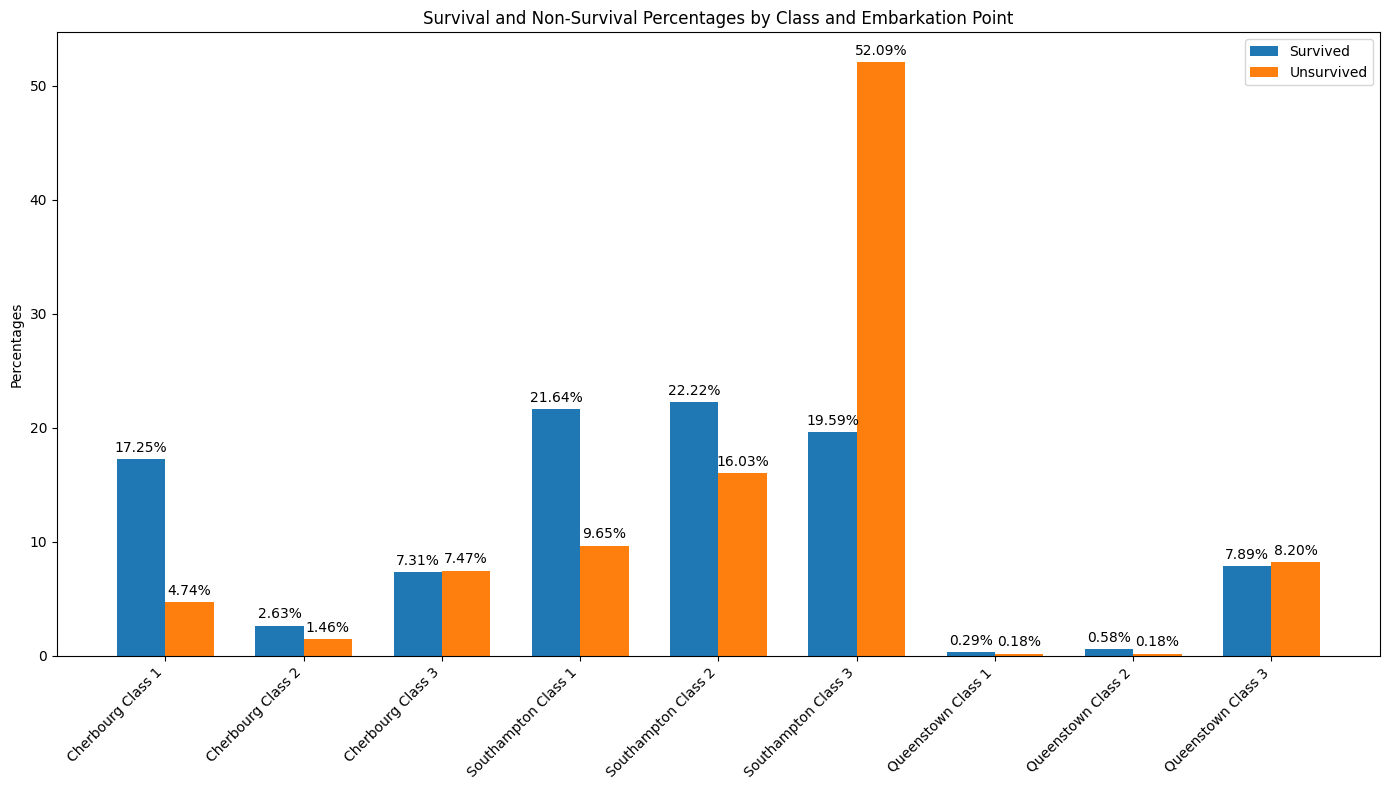

In [93]:
# Data setup
labels = ['Cherbourg Class 1', 'Cherbourg Class 2', 'Cherbourg Class 3', 
          'Southampton Class 1', 'Southampton Class 2', 'Southampton Class 3', 
          'Queenstown Class 1', 'Queenstown Class 2', 'Queenstown Class 3']
survived_percentages = [C_1 / survived_count * 100, C_2 / survived_count * 100, C_3 / survived_count * 100, 
                        S_1 / survived_count * 100, S_2 / survived_count * 100, S_3 / survived_count * 100, 
                        Q_1 / survived_count * 100, Q_2 / survived_count * 100, Q_3 / survived_count * 100]
unsurvived_percentages = [not_C_1 / non_survived_count * 100, not_C_2 / non_survived_count * 100, not_C_3 / non_survived_count * 100, 
                          not_S_1 / non_survived_count * 100, not_S_2 / non_survived_count * 100, not_S_3 / non_survived_count * 100, 
                          not_Q_1 / non_survived_count * 100, not_Q_2 / non_survived_count * 100, not_Q_3 / non_survived_count * 100]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))

# Plotting
bars1 = ax.bar(x - width/2, survived_percentages, width, label='Survived')
bars2 = ax.bar(x + width/2, unsurvived_percentages, width, label='Unsurvived')

# Adding percentages on top of the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

# Setting labels, title, and custom x-axis tick labels
ax.set_ylabel('Percentages')
ax.set_title('Survival and Non-Survival Percentages by Class and Embarkation Point')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha="right")
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

from here we can see : for class 1 there is a possibilte to survive about 60 to 70 % and for class 2 a possiblite to survive 50% and for class 3 about 25% to 30% for people comming  from Cherbourg (France) the majority are class 1 and then comes with a little diffrence class 3 then class 2 and for people comming from Southampton (United Kingdom) they are the majority of passenger and class 3 is it major class with big diffrence with class 2 and class 1 and for class 1 and class 2 are close for people comming from Queenstown (now known as Cobh, Ireland they are the lowest passengers in number compare to Cherbourg (France) and Southampton (United Kingdom) and the most majority about 90 % are class 3 

according to this description that i've see it i've impelment  a new feature

In [94]:
def calculate_index_regarding_class_and_Embarked(pclass, embarked):
    if embarked == 'C':
        return 0.68 if pclass == 1 else 0.38 if pclass == 3 else 0.56
    elif embarked == 'S':
        return 0.56 if pclass == 1 else 0.47 if pclass == 2 else 0.20
    elif embarked == 'Q':
        return 0.34 if pclass == 3 else 0.6  # Assuming a default for non-class 3 passengers from Q
    else:
        return 0.4  # Default probability if embarkation point is unknown or not listed

# Apply the function to each row in the DataFrame to create the new feature
train_data['index_regarding_class_and_Embarked'] = train_data.apply(lambda row: calculate_index_regarding_class_and_Embarked(row['Pclass'], row['Embarked']), axis=1)

In [95]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'index_Age',
       'Gender_Survival_index', 'index_regarding_class_and_Embarked'],
      dtype='object')

In [96]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,index_Age,Gender_Survival_index,index_regarding_class_and_Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,7.938810e+05,0.2,0.20
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,3.139133e-17,0.8,0.68
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1.325745e+02,0.8,0.20
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,6.305117e-16,0.8,0.56
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,6.305117e-16,0.2,0.20


In [97]:
train_data['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

so the number of parents or childs in titanic for each personne are 0 or 1 or 2 or 3 or 4 or 5 or 6

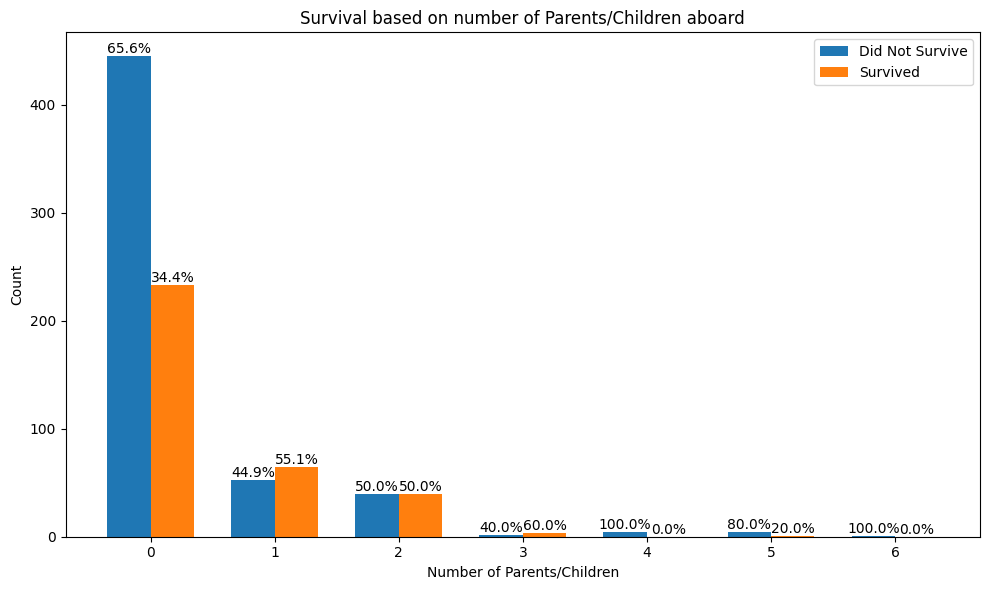

In [98]:
# Prepare the data
parch_counts = train_data.groupby(['Parch', 'Survived']).size().unstack(fill_value=0)
total_counts = parch_counts.sum(axis=1)
percentages = parch_counts.divide(total_counts, axis=0) * 100

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Locations of the left bar-edges
bar_locs = np.arange(len(parch_counts))

# Width of the bars
bar_width = 0.35

# Plotting both 'Survived' and 'Did not survive' bars
bars1 = ax.bar(bar_locs - bar_width/2, parch_counts[0], bar_width, label='Did Not Survive')
bars2 = ax.bar(bar_locs + bar_width/2, parch_counts[1], bar_width, label='Survived')

# Annotating bars with percentages
for idx, (index, row) in enumerate(percentages.iterrows()):
    ax.annotate(f'{row[0]:.1f}%', 
                (bar_locs[idx] - bar_width/2, parch_counts.iloc[idx, 0]),
                ha='center', va='bottom')
    ax.annotate(f'{row[1]:.1f}%', 
                (bar_locs[idx] + bar_width/2, parch_counts.iloc[idx, 1]),
                ha='center', va='bottom')

# Adding some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Number of Parents/Children')
ax.set_ylabel('Count')
ax.set_title('Survival based on number of Parents/Children aboard')
ax.set_xticks(bar_locs)
ax.set_xticklabels(parch_counts.index)

ax.legend()

plt.tight_layout()
plt.show()

from this diagram we can see that passenger that doesn't have parent or childerns have 33.8% to survive and for person have 1 parent or child have 53.2% to survive for person have 2 he have 47.8% to survive and all the persons that have three they survive and for >3 they all not survive

In [99]:
def calculate_survival_index_based_on_parch(parch):
    if parch == 0:
        return 0.338
    elif parch == 1:
        return 0.532
    elif parch == 2:
        return 0.478
    elif parch == 3:
        return 1.0
    else:  # More than 3 parents/children
        return 0.0

# Apply the function to each row in the DataFrame to create the new feature
train_data['survival_index_based_on_parch'] = train_data['Parch'].apply(calculate_survival_index_based_on_parch)

In [100]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,index_Age,Gender_Survival_index,index_regarding_class_and_Embarked,survival_index_based_on_parch
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,7.938810e+05,0.2,0.20,0.338
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,3.139133e-17,0.8,0.68,0.338
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1.325745e+02,0.8,0.20,0.338
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,6.305117e-16,0.8,0.56,0.338
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,6.305117e-16,0.2,0.20,0.338


In [101]:
train_data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

and from here the number of brothers or husbands or wife in titanic for each personne are 0 or 1 or 2 or 3 or 4 or 5 or 8

let's try to see who survive from types and no ?  count

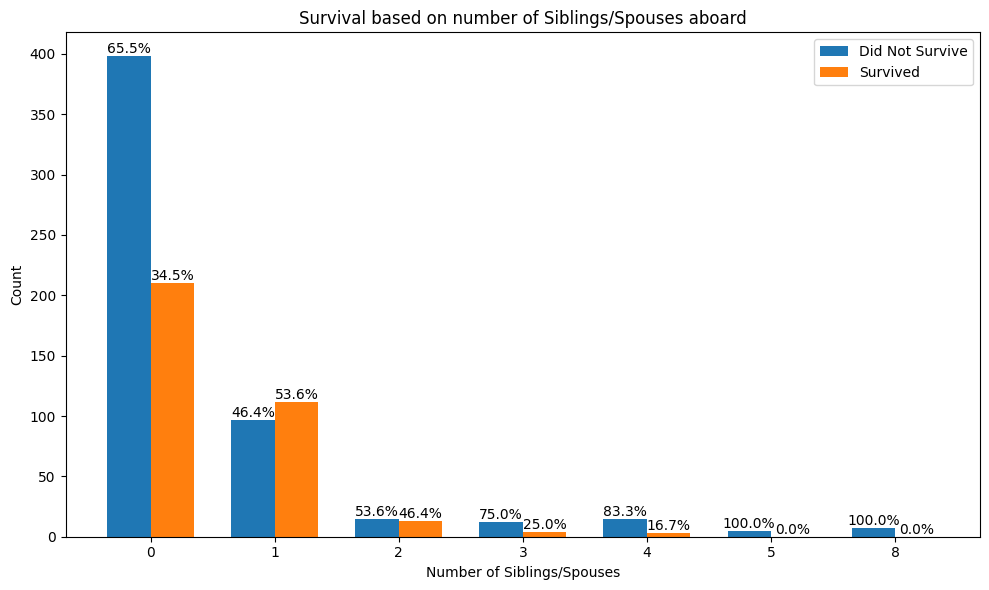

In [102]:

# Prepare the data
sibsp_counts = train_data.groupby(['SibSp', 'Survived']).size().unstack(fill_value=0)
total_counts = sibsp_counts.sum(axis=1)
percentages = sibsp_counts.divide(total_counts, axis=0) * 100

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Locations of the left bar-edges
bar_locs = np.arange(len(sibsp_counts))

# Width of the bars
bar_width = 0.35

# Plotting both 'Survived' and 'Did not survive' bars
bars1 = ax.bar(bar_locs - bar_width/2, sibsp_counts[0], bar_width, label='Did Not Survive')
bars2 = ax.bar(bar_locs + bar_width/2, sibsp_counts[1], bar_width, label='Survived')

# Annotating bars with percentages
for idx, (index, row) in enumerate(percentages.iterrows()):
    ax.annotate(f'{row[0]:.1f}%', 
                (bar_locs[idx] - bar_width/2, sibsp_counts.iloc[idx, 0]),
                ha='center', va='bottom')
    ax.annotate(f'{row[1]:.1f}%', 
                (bar_locs[idx] + bar_width/2, sibsp_counts.iloc[idx, 1]),
                ha='center', va='bottom')

# Adding some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Number of Siblings/Spouses')
ax.set_ylabel('Count')
ax.set_title('Survival based on number of Siblings/Spouses aboard')
ax.set_xticks(bar_locs)
ax.set_xticklabels(sibsp_counts.index)

ax.legend()

plt.tight_layout()
plt.show()

here we can see personens doesn't have brothers or husbands or wife survive by 34%  and who have 1 survive by 0.5 and who have 2 survive by 0.47 and for 3 survive by 30% and for 4 they survive by 18% and for 5 and 8 they doesn't survive

In [103]:
def calculate_survival_rate_based_on_sibsp(sibsp):
    if sibsp == 0:
        return 0.34
    elif sibsp == 1:
        return 0.5
    elif sibsp == 2:
        return 0.47
    elif sibsp == 3:
        return 0.3
    elif sibsp == 4:
        return 0.18
    elif sibsp in [5, 8]:
        return 0.0
    else:
        return 0  # Default survival rate if sibsp is not in the specified categories

# Apply the function to each row in the DataFrame to create the new feature
train_data['survival_index_based_on_sibsp'] = train_data['SibSp'].apply(calculate_survival_rate_based_on_sibsp)

In [104]:
train_data.head

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                                                 

it seems that survival_rate_based_on_sibsp and survival_index_based_on_parch have close values now for that let's create only one feature which is the avergae between this two features to reduce the dimension of inputs 

In [105]:
train_data.head

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                                                 

now we've build our features let's extract them

In [106]:
train_data = train_data[['survival_index_based_on_sibsp','survival_index_based_on_parch', 'index_regarding_class_and_Embarked','index_Age','Gender_Survival_index','Survived']]

In [107]:
train_data.head

<bound method NDFrame.head of      survival_index_based_on_sibsp  survival_index_based_on_parch  \
0                             0.50                          0.338   
1                             0.50                          0.338   
2                             0.34                          0.338   
3                             0.50                          0.338   
4                             0.34                          0.338   
..                             ...                            ...   
886                           0.34                          0.338   
887                           0.34                          0.338   
888                           0.50                          0.478   
889                           0.34                          0.338   
890                           0.34                          0.338   

     index_regarding_class_and_Embarked     index_Age  Gender_Survival_index  \
0                                  0.20  7.938810e+05        

# now we've  prepare the features let's try to split the train data and test data then give it to a logistic model and try to test over many paramtres to get best the parametres then train the data with this parametres then evaluate our model 

In [108]:
X = train_data[['survival_index_based_on_sibsp','survival_index_based_on_parch','index_Age', 'index_regarding_class_and_Embarked','Gender_Survival_index']]
y = train_data['Survived']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = LogisticRegression(max_iter=3000)
{'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
parameters = [
    {'C': [100], 
     'penalty': ['l2'],  # 'l2' is supported by the default 'lbfgs' solver
     'solver': ['lbfgs']},
    {'C': [0.01, 0.1, 1, 10, 100, 1000], 
     'penalty': ['l1'],  # 'l1' is supported by 'liblinear' solver
     'solver': ['liblinear']},
    {'C': [0.01, 0.1, 1, 10, 100, 1000], 
     'penalty': ['elasticnet'],  # 'elasticnet' requires 'saga' solver and 'l1_ratio'
     'solver': ['saga'], 
     'l1_ratio': [0.5]}  # Example l1_ratio, can be tuned as well
]

grid_search = GridSearchCV(classifier, parameters, scoring='accuracy', cv=5)

grid_search.fit(X_train, y_train)

# Test performance
best_estimator = grid_search.best_estimator_

y_prediction = best_estimator.predict(X_test)

score = accuracy_score(y_prediction, y_test)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Model Accuracy: {score:.2f}")

Best Parameters: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Model Accuracy: 0.84


In [109]:
score

0.8379888268156425

# the Accuracy of This model is 84%